# 1. Import

In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# 2. Reading and Pre-Processing

In [443]:
Data = pd.read_csv(r"TF_indicators.csv")
Data.head()

,year,ccode,cname,ph_infrastructure,ict,business,border_transp,export
0,2004.0,ALB,Albania,0.110517,0.041279,0.122466,0.541888,Add
1,2004.0,DZA,Algeria,0.310589,0.266230,0.381169,0.661036,Add
2,2004.0,ARG,Argentina,0.402363,0.407450,0.198051,0.700753,Add
3,2004.0,ARM,Armenia,0.225800,0.245806,0.253102,0.624800,Add
4,2004.0,AUS,Australia,0.795210,0.784953,0.839960,0.756010,Add


In [444]:
Output = pd.read_csv(r"Export.csv")
Output.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Exports of goods and services (current US$),NE.EXP.GNFS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.088123e+09,2.184551e+09,2.158564e+09,2.142860e+09,2.243517e+09,2.367132e+09,2.486900e+09,1.347955e+09,2.154232e+09,NaN
1,Africa Eastern and Southern,AFE,Exports of goods and services (current US$),NE.EXP.GNFS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.834300e+11,2.821590e+11,2.170550e+11,1.948520e+11,2.276710e+11,2.554530e+11,2.391060e+11,2.055720e+11,2.791990e+11,3.056730e+11
2,Afghanistan,AFG,Exports of goods and services (current US$),NE.EXP.GNFS.CD,2.222223e+07,2.444446e+07,2.666668e+07,6.888892e+07,7.111114e+07,1.133333e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Exports of goods and services (current US$),NE.EXP.GNFS.CD,1.744366e+09,1.916475e+09,1.952531e+09,2.086227e+09,2.427139e+09,2.667226e+09,...,1.963360e+11,2.078590e+11,1.334860e+11,1.168690e+11,1.428970e+11,1.712230e+11,1.762710e+11,1.214670e+11,1.618830e+11,NaN
4,Angola,AGO,Exports of goods and services (current US$),NE.EXP.GNFS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.769742e+10,6.134144e+10,2.595175e+10,1.401738e+10,2.000493e+10,3.176775e+10,2.827171e+10,1.911095e+10,2.984373e+10,NaN


In [445]:
output_column_1 = Output[['2004', 'Country Code']]
output_column_2 = Output[['2005', 'Country Code']]
output_column_3 = Output[['2006', 'Country Code']]
output_column_4 = Output[['2007', 'Country Code']]
output_column_3.head()

,2006,Country Code
0,1.595335e+09,ABW
1,1.722240e+11,AFE
2,NaN,AFG
3,1.252320e+11,AFW
4,3.324512e+10,AGO


In [446]:
Data.drop('export',inplace = True, axis=1)
Data.head()

,year,ccode,cname,ph_infrastructure,ict,business,border_transp
0,2004.0,ALB,Albania,0.110517,0.041279,0.122466,0.541888
1,2004.0,DZA,Algeria,0.310589,0.266230,0.381169,0.661036
2,2004.0,ARG,Argentina,0.402363,0.407450,0.198051,0.700753
3,2004.0,ARM,Armenia,0.225800,0.245806,0.253102,0.624800
4,2004.0,AUS,Australia,0.795210,0.784953,0.839960,0.756010


In [447]:
Data_1 = Data.loc[Data['year'] == 2004]
Data_2 = Data.loc[Data['year'] == 2005]
Data_3 = Data.loc[Data['year'] == 2006]
Data_4 = Data.loc[Data['year'] == 2007]

In [448]:
Data_1 = Data_1.merge(output_column_1[['Country Code', '2004']], left_on='ccode', right_on='Country Code', how='left')
Data_2 = Data_2.merge(output_column_2[['Country Code', '2005']], left_on='ccode', right_on='Country Code', how='left')
Data_3 = Data_3.merge(output_column_3[['Country Code', '2006']], left_on='ccode', right_on='Country Code', how='left')
Data_4 = Data_4.merge(output_column_4[['Country Code', '2007']], left_on='ccode', right_on='Country Code', how='left')

In [449]:
Data_1.drop(['cname','Country Code'],inplace = True,axis=1)
Data_2.drop(['cname','Country Code'],inplace = True,axis=1)
Data_3.drop(['cname','Country Code'],inplace = True,axis=1)
Data_4.drop(['cname','Country Code'],inplace = True,axis=1)

In [450]:
new_column_names = ['year','ccode','Physical_infrastructure','ICT','Business','Border_Transportation','Export']
Data_1.columns=new_column_names
Data_2.columns=new_column_names
Data_3.columns=new_column_names
Data_4.columns=new_column_names

In [451]:
df = pd.concat([Data_1, Data_2, Data_3, Data_4], ignore_index=True)

In [452]:
import pandas as pd

# Assuming your DataFrame is named df
# Replace df with the actual name of your DataFrame

# Sort the DataFrame based on the 'ccode' column
df = df.sort_values(by='ccode')

# Reset the index if needed
df.reset_index(drop=True, inplace=True)

In [453]:
# Group by 'ccode' and calculate the mean for each feature
feature_means = df.groupby('ccode').transform('mean')

# Subtract the mean values from the corresponding feature values
df[['Physical_infrastructure', 'ICT', 'Business', 'Border_Transportation', 'Export']] -= feature_means[['Physical_infrastructure', 'ICT', 'Business', 'Border_Transportation', 'Export']]

In [454]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df["Export"]=scaler.fit_transform(df[["Export"]])

Adding T-1 regressors (entity demeaned data is been used hence no need to do it in the code) 

In [455]:
import pandas as pd

# Assuming your DataFrame is named df
# Replace df with the actual name of your DataFrame

# Convert the 'year' column to string type to prepare for dummy variable creation
df['year'] = df['year'].astype(str)

# Create dummy variables for the 'year' column
dummy_variables = pd.get_dummies(df['year'], prefix='dummy_year')

# Concatenate the dummy variables to the original DataFrame
df = pd.concat([df, dummy_variables], axis=1)

Data = df
Data.drop('dummy_year_2007.0',inplace = True, axis=1)
Data.head(10)

,year,ccode,Physical_infrastructure,ICT,Business,Border_Transportation,Export,dummy_year_2004.0,dummy_year_2005.0,dummy_year_2006.0
0,2004.0,ALB,-0.032488,-0.058759,-0.050232,-0.056431,0.460555,1,0,0
1,2007.0,ALB,0.056262,0.102159,0.052025,0.041247,0.462737,0,0,0
2,2006.0,ALB,0.007814,0.012899,0.034568,0.064061,0.461549,0,0,1
3,2005.0,ALB,-0.031588,-0.056298,-0.036362,-0.048878,0.460950,0,1,0
4,2006.0,ARE,-0.004629,0.012988,-0.014751,0.038270,0.482415,0,0,1
5,2005.0,ARE,-0.003317,-0.038784,-0.023337,-0.009588,0.435752,0,1,0
6,2007.0,ARE,0.008006,0.042458,-0.007068,0.009223,0.535060,0,0,0
7,2004.0,ARE,-0.000060,-0.016661,0.045156,-0.037905,0.392564,1,0,0
8,2004.0,ARG,0.034227,-0.013813,0.006181,0.009882,0.443348,1,0,0
9,2006.0,ARG,-0.007498,0.031920,0.010057,-0.007117,0.465299,0,0,1


# 2.1 Null Treatment

In [456]:
Data.isnull().sum()*100/Data.shape[0]
Data.dropna(inplace = True)
Data.isnull().sum()

year                       0
ccode                      0
Physical_infrastructure    0
ICT                        0
Business                   0
Border_Transportation      0
Export                     0
dummy_year_2004.0          0
dummy_year_2005.0          0
dummy_year_2006.0          0
dtype: int64

# 2.1 Outlier Treatment

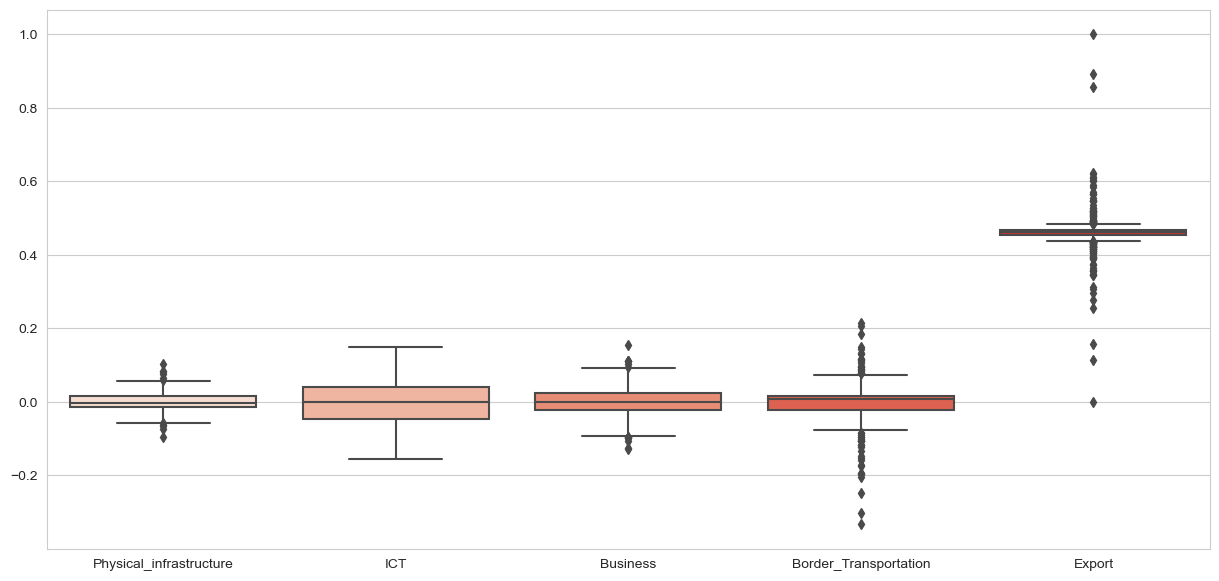

In [457]:
plt.figure(figsize=(15,7))
sns.boxplot(data = Data[['Physical_infrastructure', 'ICT', 'Business', 'Border_Transportation', 'Export']])
plt.show()

In [458]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named Data
# Replace Data with the actual name of your DataFrame

# Define the winsorization thresholds
export_threshold = (0.07, 0.07)
border_transportation_threshold = (0.1, 0.1)
business_threshold = (0.05, 0.05)
physical_infrastructure_threshold = (0.05, 0.05)

# Create boolean masks for values outside the winsorization thresholds
export_mask = (Data['Export'] >= Data['Export'].quantile(export_threshold[0])) & (Data['Export'] <= Data['Export'].quantile(1 - export_threshold[1]))
border_transportation_mask = (Data['Border_Transportation'] >= Data['Border_Transportation'].quantile(border_transportation_threshold[0])) & (Data['Border_Transportation'] <= Data['Border_Transportation'].quantile(1 - border_transportation_threshold[1]))
business_mask = (Data['Business'] >= Data['Business'].quantile(business_threshold[0])) & (Data['Business'] <= Data['Business'].quantile(1 - business_threshold[1]))
physical_infrastructure_mask = (Data['Physical_infrastructure'] >= Data['Physical_infrastructure'].quantile(physical_infrastructure_threshold[0])) & (Data['Physical_infrastructure'] <= Data['Physical_infrastructure'].quantile(1 - physical_infrastructure_threshold[1]))

# Apply the masks to filter out the values
Data = Data[export_mask & border_transportation_mask & business_mask & physical_infrastructure_mask]
Data.shape

(250, 10)

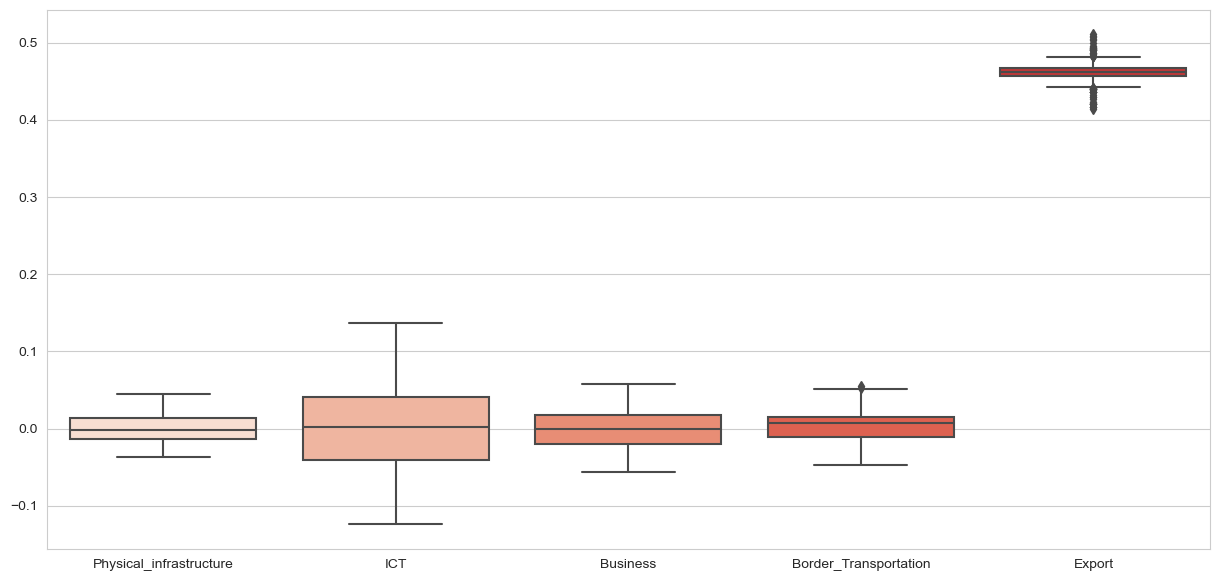

In [459]:
plt.figure(figsize=(15,7))
sns.boxplot(data = Data[['Physical_infrastructure', 'ICT', 'Business', 'Border_Transportation', 'Export']])
plt.show()

In [460]:
new_column_names = ['Year','ccode','Physical_infrastructure','ICT','Business','Border_Transportation','Export','2004','2005','2006']
Data.columns=new_column_names
Data.head()

,Year,ccode,Physical_infrastructure,ICT,Business,Border_Transportation,Export,2004,2005,2006
4,2006.0,ARE,-0.004629,0.012988,-0.014751,0.038270,0.482415,0,0,1
5,2005.0,ARE,-0.003317,-0.038784,-0.023337,-0.009588,0.435752,0,1,0
8,2004.0,ARG,0.034227,-0.013813,0.006181,0.009882,0.443348,1,0,0
9,2006.0,ARG,-0.007498,0.031920,0.010057,-0.007117,0.465299,0,0,1
12,2006.0,ARM,0.002086,0.068987,0.027815,0.002716,0.461532,0,0,1


# Fit model for both developed and developing nations

In [461]:
#Feature we consider are numerical features stored in "X" which hold meaning, all other columns are omitted

X =Data[['Physical_infrastructure','ICT','Business','Border_Transportation','2004','2005','2006']]

#Target is stored in "Y"

Y = Data['Export']

#Using model_selection.train_test_split from sklearn to split the data into training and testing sets.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)


In [462]:
import statsmodels.api as sm

# Assuming X_train, Y_train, X_test are already defined

X_train1 = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train1)
results = model.fit()

X_test1 = sm.add_constant(X_test)
predictions = results.predict(X_test1)  # Use results instead of model
# Get the coefficients
coefficients = results.params

# Display the coefficients
print("Coefficients:")
print(coefficients)
print(results.summary())

Coefficients:
const                      0.477022
Physical_infrastructure   -0.023794
ICT                       -0.055284
Business                   0.022755
Border_Transportation      0.034134
2004                      -0.032251
2005                      -0.027093
2006                      -0.005853
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Export   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     20.12
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.96e-19
Time:                        15:37:53   Log-Likelihood:                 524.25
No. Observations:                 175   AIC:                            -1033.
Df Residuals:                     167   BIC:                            -1007.
Df Model:                           7              

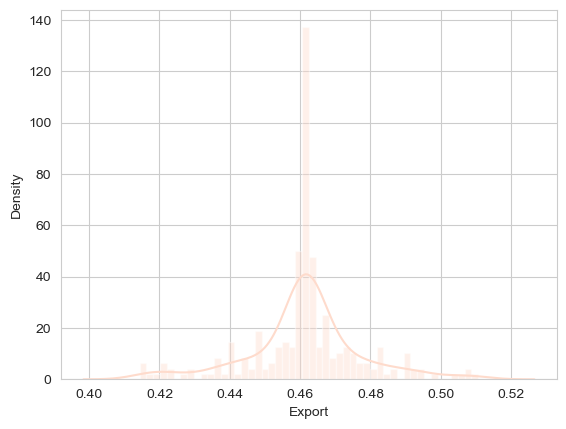

In [463]:
sns.set_palette("Reds")
sns.set_style('whitegrid')

# Residual check 

sns.distplot((Y),bins=50);

# Fit model only for developing nations

In [464]:
df_up=pd.read_csv("TF_indicators_up.csv")
df_up.head()

,year,ccode,Physical_infrastructure,ICT,Business,Border_Transportation,Export
0,2004,ARE,0.757377,0.740468,0.777916,0.767138,9.396860e+10
1,2004,ARG,0.402363,0.407450,0.198051,0.700753,3.926700e+10
2,2004,AUS,0.795210,0.784953,0.839960,0.756010,1.050000e+11
3,2004,AUT,0.789591,0.697887,0.753275,0.931345,1.410000e+11
4,2004,BEL,0.890965,0.650968,0.672023,0.931345,2.620000e+11


In [465]:
import pandas as pd

# Assuming your DataFrame is named df
# Replace df with the actual name of your DataFrame

# Sort the DataFrame based on the 'ccode' column
df_up = df_up.sort_values(by='ccode')

# Reset the index if needed
df_up.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
df_up.head()

,year,ccode,Physical_infrastructure,ICT,Business,Border_Transportation,Export
0,2004,ARE,0.757377,0.740468,0.777916,0.767138,9.396860e+10
1,2005,ARE,0.754120,0.718345,0.709423,0.795456,1.220000e+11
2,2007,ARE,0.765442,0.799587,0.725692,0.814267,1.870000e+11
3,2006,ARE,0.752807,0.770117,0.718009,0.843313,1.520000e+11
4,2006,ARG,0.360637,0.453183,0.201927,0.683754,5.355025e+10


In [466]:
# Group by 'ccode' and calculate the mean for each feature
feature_means = df_up.groupby('ccode').transform('mean')

# Subtract the mean values from the corresponding feature values
df_up[['Physical_infrastructure', 'ICT', 'Business', 'Border_Transportation', 'Export']] -= feature_means[['Physical_infrastructure', 'ICT', 'Business', 'Border_Transportation', 'Export']]

# Display the resulting DataFrame
df_up.head()

,year,ccode,Physical_infrastructure,ICT,Business,Border_Transportation,Export
0,2004,ARE,-0.000060,-0.016661,0.045156,-0.037905,-4.477355e+10
1,2005,ARE,-0.003317,-0.038784,-0.023337,-0.009588,-1.674215e+10
2,2007,ARE,0.008006,0.042458,-0.007068,0.009223,4.825785e+10
3,2006,ARE,-0.004629,0.012988,-0.014751,0.038270,1.325785e+10
4,2006,ARG,-0.007498,0.031920,0.010057,-0.007117,2.505813e+09


In [467]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df_up["Export"]=scaler.fit_transform(df_up[["Export"]])

In [468]:
import pandas as pd

# Assuming your DataFrame is named df
# Replace df with the actual name of your DataFrame

# Convert the 'year' column to string type to prepare for dummy variable creation
df_up['year'] = df_up['year'].astype(str)

# Create dummy variables for the 'year' column
dummy_variables = pd.get_dummies(df_up['year'], prefix='dummy_year')

# Concatenate the dummy variables to the original DataFrame
df_up = pd.concat([df_up, dummy_variables], axis=1)

Data = df_up
Data.drop('dummy_year_2007',inplace = True, axis=1)

In [469]:
Data.isnull().sum()*100/Data.shape[0]
Data.dropna(inplace = True)
Data.isnull().sum()

year                       0
ccode                      0
Physical_infrastructure    0
ICT                        0
Business                   0
Border_Transportation      0
Export                     0
dummy_year_2004            0
dummy_year_2005            0
dummy_year_2006            0
dtype: int64

In [470]:
new_column_names = ['Year','ccode','Physical_infrastructure','ICT','Business','Border_Transportation','Export','2004','2005','2006']
Data.columns=new_column_names
Data.head(10)

,Year,ccode,Physical_infrastructure,ICT,Business,Border_Transportation,Export,2004,2005,2006
0,2004,ARE,-0.000060,-0.016661,0.045156,-0.037905,0.392384,1,0,0
1,2005,ARE,-0.003317,-0.038784,-0.023337,-0.009588,0.435311,0,1,0
2,2007,ARE,0.008006,0.042458,-0.007068,0.009223,0.534851,0,0,0
3,2006,ARE,-0.004629,0.012988,-0.014751,0.038270,0.481252,0,0,1
4,2006,ARG,-0.007498,0.031920,0.010057,-0.007117,0.464787,0,0,1
5,2007,ARG,-0.072561,-0.013404,-0.049926,-0.012648,0.482570,0,0,0
6,2005,ARG,0.045832,-0.004703,0.033688,0.009882,0.453528,0,1,0
7,2004,ARG,0.034227,-0.013813,0.006181,0.009882,0.442914,1,0,0
8,2006,AUS,-0.012583,-0.003120,-0.003380,0.025097,0.477029,0,0,1
9,2004,AUS,0.031362,-0.002381,-0.002775,-0.056979,0.409648,1,0,0


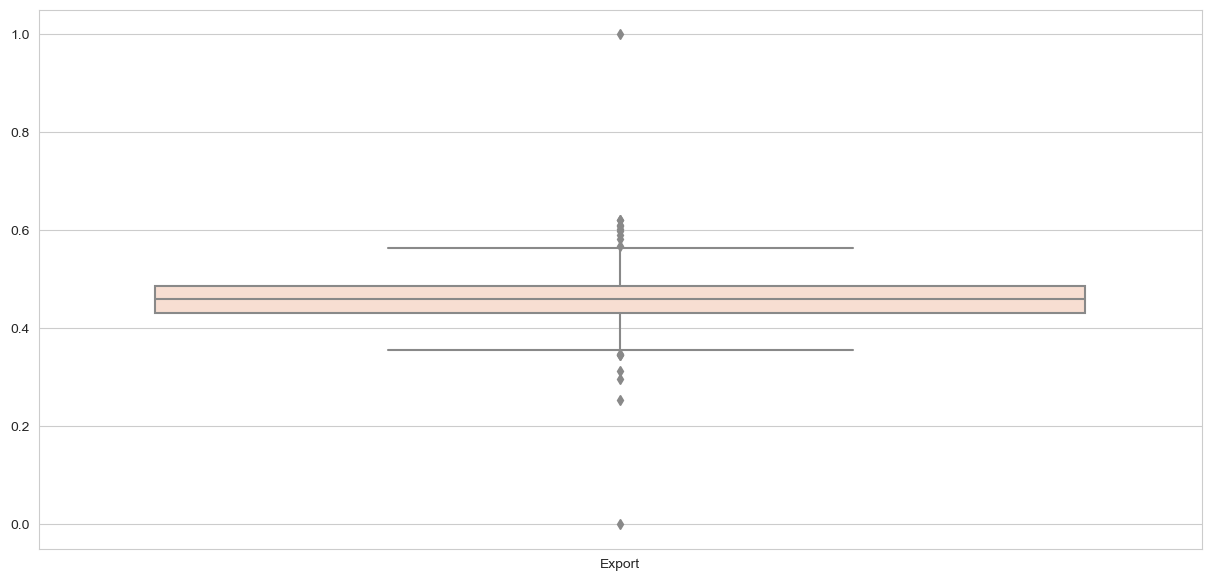

In [471]:
plt.figure(figsize=(15,7))
sns.boxplot(data = Data[['Export']])
plt.show()

In [472]:
from scipy.stats.mstats import winsorize
winsorize(Data['Export'],(0.05,0.05),inplace=True)

masked_array(data=[0.39238353, 0.43531064, 0.53485123, 0.48125245,
                   0.46478685, 0.4825695 , 0.45352794, 0.44291357,
                   0.4770291 , 0.40964778, 0.51378254, 0.44333844,
                   0.46592649, 0.51799387, 0.4398928 , 0.41998469,
                   0.47013783, 0.55436447, 0.4287902 , 0.39050536,
                   0.47779479, 0.4042879 , 0.51914242, 0.44257274,
                   0.43912711, 0.49272588, 0.36408882, 0.54785605,
                   0.40122511, 0.46707504, 0.4287902 , 0.5467075 ,
                   0.44668458, 0.49069374, 0.47477377, 0.43164576,
                   0.56891271, 0.56891271, 0.35872894, 0.35872894,
                   0.42010652, 0.50837044, 0.4700856 , 0.44523529,
                   0.47358346, 0.42151608, 0.50421133, 0.44448698,
                   0.47049803, 0.4353627 , 0.48031337, 0.45762375,
                   0.4651608 , 0.41921899, 0.39471669, 0.56470138,
                   0.49300108, 0.46468479, 0.44784685, 0.43826

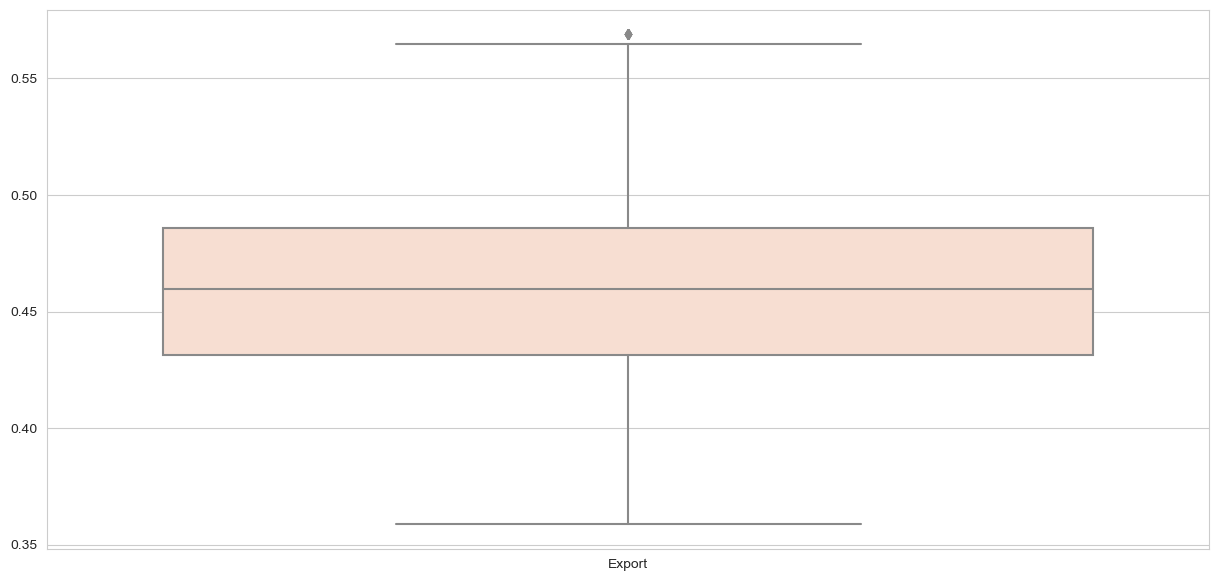

In [473]:
plt.figure(figsize=(15,7))
sns.boxplot(data = Data[['Export']])
plt.show()

In [474]:
#Feature we consider are numerical features stored in "X" which hold meaning, all other columns are omitted

X =Data[['Physical_infrastructure','ICT','Business','Border_Transportation','2004','2005','2006']]

#Target is stored in "Y"

Y = Data['Export']

#Using model_selection.train_test_split from sklearn to split the data into training and testing sets.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)


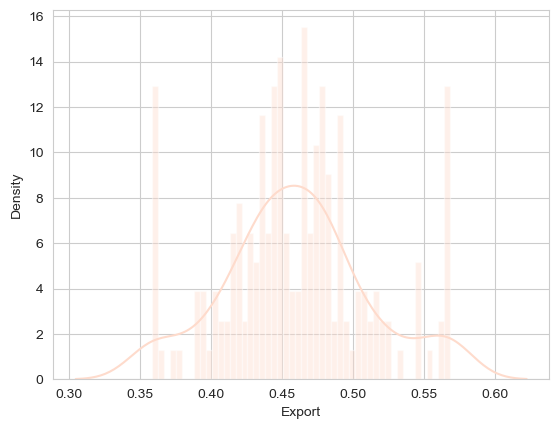

In [475]:
sns.set_palette("Reds")
sns.set_style('whitegrid')

# Residual check 

sns.distplot((Y),bins=50);

In [476]:
import statsmodels.api as sm

# Assuming X_train, Y_train, X_test are already defined

X_train1 = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train1)
results = model.fit()

X_test1 = sm.add_constant(X_test)
predictions = results.predict(X_test1)  # Use results instead of model
# Get the coefficients
coefficients = results.params

print(results.summary())

Coefficients:
const                      0.520068
Physical_infrastructure    0.043583
ICT                       -0.037327
Business                   0.051411
Border_Transportation      0.147137
2004                      -0.116137
2005                      -0.082791
2006                      -0.042791
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Export   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     55.97
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           7.50e-35
Time:                        15:38:15   Log-Likelihood:                 293.47
No. Observations:                 128   AIC:                            -570.9
Df Residuals:                     120   BIC:                            -548.1
Df Model:                           7              

In [477]:
#Feature we consider are numerical features stored in "X" which hold meaning, all other columns are omitted

X =Data[['Border_Transportation','2004','2005','2006']]

#Target is stored in "Y"

Y = Data['Export']

#Using model_selection.train_test_split from sklearn to split the data into training and testing sets.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)


In [478]:
import statsmodels.api as sm

# Assuming X_train, Y_train, X_test are already defined

X_train1 = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train1)
results = model.fit()

X_test1 = sm.add_constant(X_test)
predictions = results.predict(X_test1)  # Use results instead of model
# Get the coefficients
coefficients = results.params

# Display the coefficients
print("Coefficients:")
print(coefficients)
print(results.summary())

Coefficients:
const                    0.518291
Border_Transportation    0.149017
2004                    -0.113138
2005                    -0.079780
2006                    -0.041367
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Export   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     99.08
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.62e-37
Time:                        15:38:39   Log-Likelihood:                 292.83
No. Observations:                 128   AIC:                            -575.7
Df Residuals:                     123   BIC:                            -561.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
           